In [1]:
import cv2
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import os

import arviz as az
import matplotlib.pyplot as plt
import pymc as pm
import pytensor.tensor as pt
import seaborn as sns

from xarray_einstats.stats import multivariate_normal

print(f"Running on PyMC v{pm.__version__}")

# Load data and define paths

In [2]:
prac_path = '/cndd2/agelber/temp_write/' #practice data
sample_path = '/cndd2/agelber/hal/space_new/' #path to each mouse sample dataset - REMOVE ZEROS
os.chdir(prac_path)

coords = pd.read_csv('coordinates.csv') # spot coordinates
counts = pd.read_csv('counts.csv') # spot gene counts
image = cv2.imread(sample_path + '030-B_S27/outs/spatial/tissue_hires_image.png' ) # brain image
coords.shape, counts.shape

((2980, 6), (32286, 2981))

In [3]:
coords

Unnamed: 0  tissue  row  col  imagerow  imagecol
0     AAACAATCTACTAGCA-1       1    3   43      1036       506
1     AAACACCAATAACTGC-1       1   59   19      1290      1553
2     AAACAGCTTTCAGAAG-1       1   43    9      1399      1255
3     AAACAGGGTCTATATT-1       1   47   13      1355      1329
4     AAACAGTGTTCCTGGG-1       1   73   43      1032      1814
...                  ...     ...  ...  ...       ...       ...
2975  TTGTTTCACATCCAGG-1       1   58   42      1043      1534
2976  TTGTTTCATTAGTCTA-1       1   60   30      1172      1571
2977  TTGTTTCCATACAACT-1       1   45   27      1205      1291
2978  TTGTTTGTATTACACG-1       1   73   41      1053      1814
2979  TTGTTTGTGTAAATTC-1       1    7   51       950       581

[2980 rows x 6 columns]

In [40]:
counts

Unnamed: 0  AAACAATCTACTAGCA-1  AAACACCAATAACTGC-1  AAACAGCTTTCAGAAG-1  \
0            Xkr4                   0                   0                   0   
1          Gm1992                   0                   0                   0   
2         Gm19938                   0                   0                   0   
3         Gm37381                   0                   0                   0   
4             Rp1                   0                   0                   0   
...           ...                 ...                 ...                 ...   
32281  AC133095.2                   0                   0                   0   
32282  AC133095.1                   0                   0                   0   
32283  AC234645.1                   0                   0                   0   
32284  AC149090.1                   1                   1                   3   
32285    humanAPP                  10                  25                   2   

       AAACAGGGTCTATATT-1  AAACAGTGTTCCTGGG-1  AAACATGGTGAGAGGA-1  \
0                       0                   0                   0   
1                       0                   0                   0   
2                       0                   0                   0   
3                       0                   0                   0   
4                       0                   0                   0   
...                   ...                 ...                 ...   
32281                   0                   0                   0   
32282                   0                   0                   0   
32283                   0                   0                   0   
32284                   3                   1                   1   
32285                   4                   1                  12   

       AAACCGGGTAGGTACC-1  AAACCGTTCGTCCAGG-1  AAACCTAAGCAGCCGG-1  ...  \
0                       0                   0                   0  ...   
1                       0                   0                   0  ...   
2                       0                   0                   0  ...   
3                       0                   0                   0  ...   
4                       0                   0                   0  ...   
...                   ...                 ...                 ...  ...   
32281                   0                   0                   0  ...   
32282                   0                   0                   0  ...   
32283                   0                   0                   0  ...   
32284                   1                   0                  11  ...   
32285                   2                   6                   5  ...   

       TTGTGTTTCCCGAAAG-1  TTGTTAGCAAATTCGA-1  TTGTTCAGTGTGCTAC-1  \
0                       0                   0                   0   
1                       0                   0                   0   
2                       0                   0                   0   
3                       0                   0                   0   
4                       0                   0                   0   
...                   ...                 ...                 ...   
32281                   0                   0                   0   
32282                   0                   0                   0   
32283                   0                   0                   0   
32284                   0                   3                   3   
32285                   6                   0                  12   

       TTGTTGGCAATGACTG-1  TTGTTGTGTGTCAAGA-1  TTGTTTCACATCCAGG-1  \
0                       0                   0                   0   
1                       0                   0                   0   
2                       0                   0                   0   
3                       0                   0                   0   
4                       0                   0                   0   
...                   ...                 ...                 ...   
3228

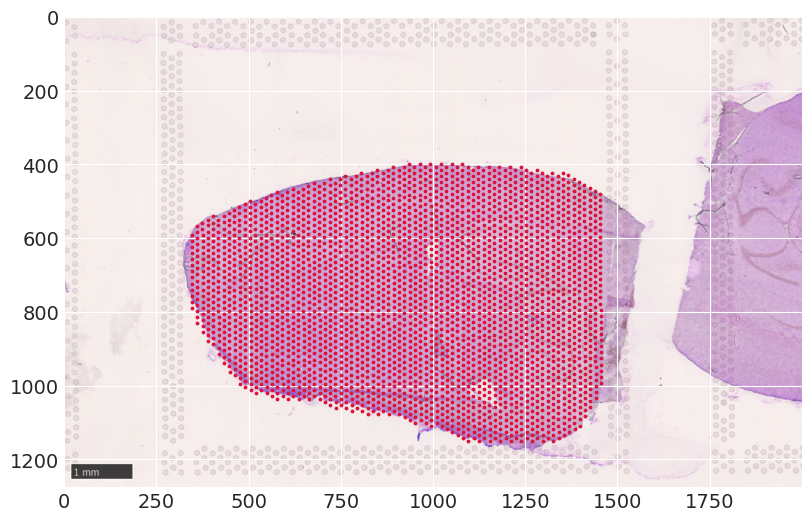

In [180]:
# IMAGE DATA
fig, ax = plt.subplots(figsize=(8,6))
plt.imshow(image)
sc = 0.77
x,y = np.array(coords['imagerow']*sc), np.array(coords['imagecol']*sc)
plt.scatter(y,x, s = 3, c = 'crimson')
plt.show()

# Gaussian process 

In [ ]:
#to make normal, for each gene divide by total count and take the log - nonegative normal 

In [181]:
# Pick a gene of interest
counts_arr = np.array(counts)[:,1:] #convert to np array and remove header
counts_sum = np.sum(counts_arr > 0, axis=1) 
top_genes = np.where(counts_sum == np.max(counts_sum))[0]

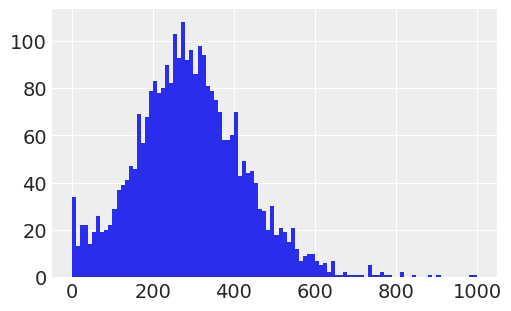

In [182]:
ch = 3
gene_vals = counts_arr[top_genes[ch]] #count values for each spot
fg,ax = plt.subplots(figsize=(5,3))
plt.hist(gene_vals, bins = 100)
plt.show()

mt-Co3


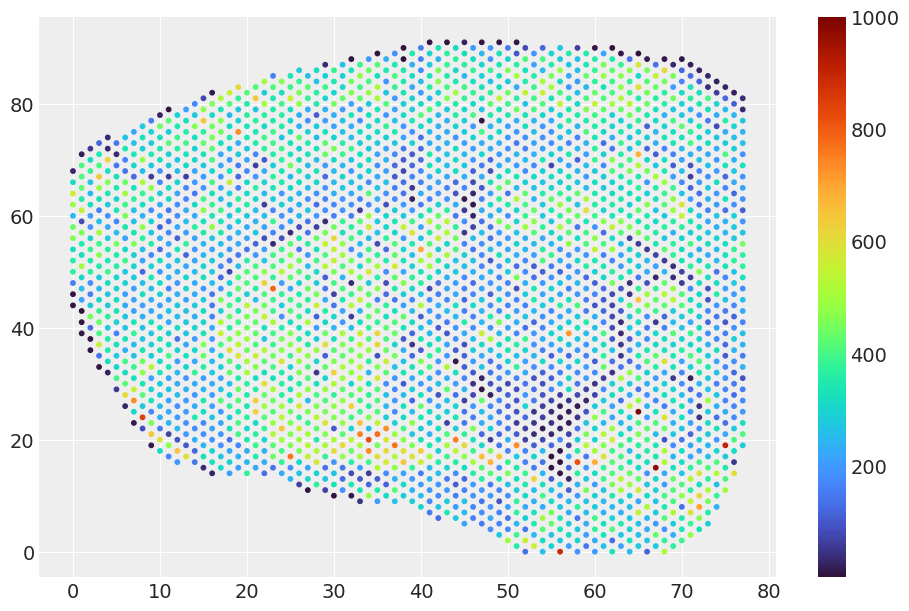

In [183]:
# Plot a given gene of interest
print(np.array(counts)[top_genes[ch]][0])
x,y = np.array(coords['row']), np.array(coords['col'])
fig, ax = plt.subplots(figsize=(9,6))
plt.scatter(x,y, s = 10, c = gene_vals, cmap = 'turbo')
plt.colorbar()
plt.show()

In [ ]:
#py_MC implementation

mt-Co3


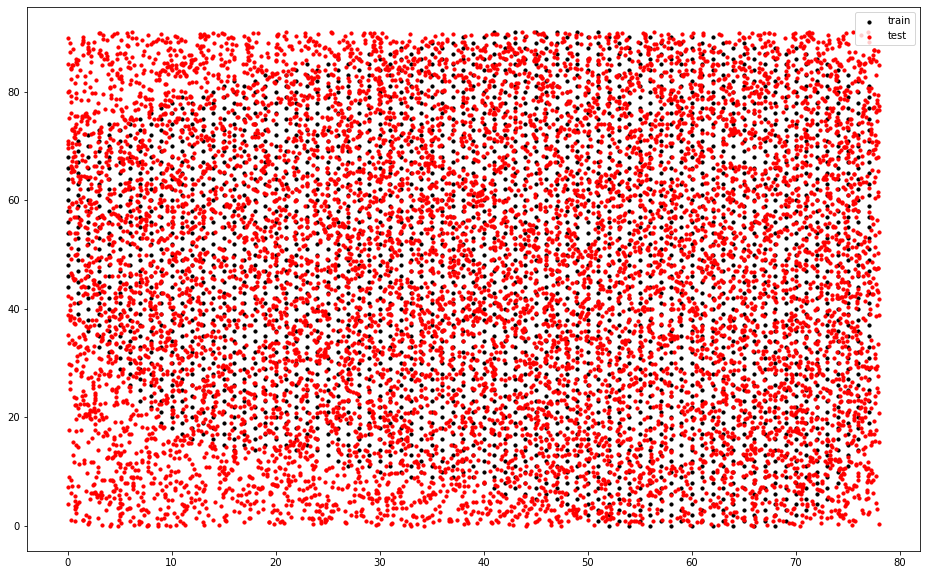

In [248]:
n = 10000
xy_min = [0, 0]
xy_max = [78, 91]
uni_samp = np.random.uniform(low=xy_min, high=xy_max, size=(n,2))

# Plot test and train samples
print(np.array(counts)[top_genes[ch]][0])
x,y = np.array(coords['row']), np.array(coords['col'])
fig, ax = plt.subplots(figsize=(16,10))
plt.scatter(x,y, s = 10, c = 'k', label= 'train')
plt.scatter(uni_samp[:,0],uni_samp[:,1], s = 10, c = 'red', label= 'test')
plt.legend()
plt.show()

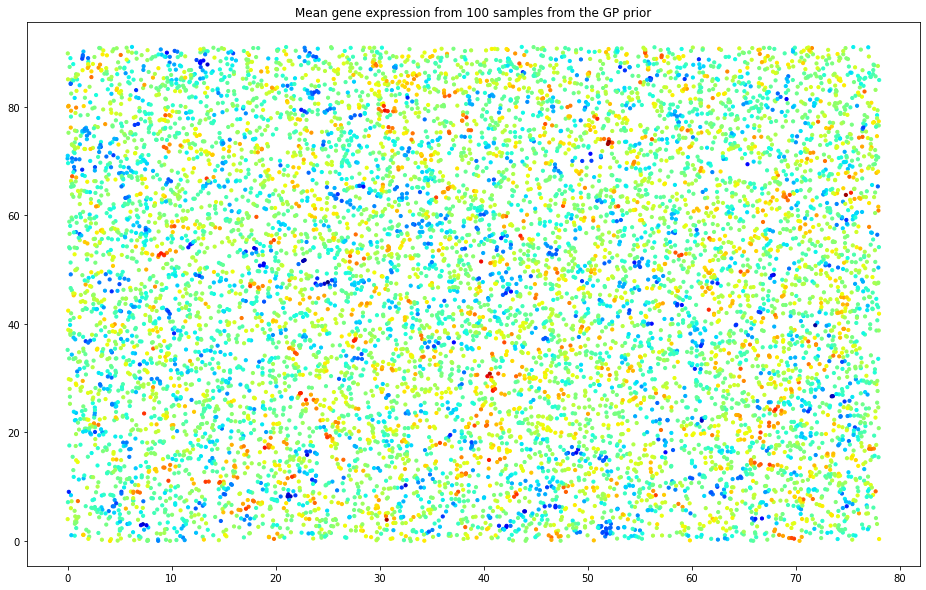

In [249]:
# Apply in 2d

n_samp = 100

#Define priors
import numpy as np
import matplotlib.pyplot as pl

#Test x datapoints
Xtest = uni_samp
n = len(Xtest)

# Define the kernel function
def kernel(a, b, param):
    sqdist = np.sum(a**2,1).reshape(-1,1) + np.sum(b**2,1) - 2*np.dot(a, b.T)
    return np.exp(-.5 * (1/param) * sqdist)

param = 0.4
K_ss = kernel(Xtest, Xtest, param)

# Get cholesky decomposition (square root) of the
# covariance matrix
L = np.linalg.cholesky(K_ss + 1e-15*np.eye(n)) #L is the square root of our covariance matrix


# Sample 3 sets of standard normals for our test points,
# multiply them by the square root of the covariance matrix
f_prior = np.dot(L, np.random.normal(size=(n,n_samp))) #Sampling 50 normal variables 3 times, and multiply by SQR of covariance to get the variance in standard values 

# Plot test and train samples
fig, ax = plt.subplots(figsize=(16,10))
plt.scatter(uni_samp[:,0],uni_samp[:,1], s = 10, c = np.mean(f_prior, axis=1), cmap = 'jet')
pl.title('Mean gene expression from ' + str(n_samp) + ' samples from the GP prior')
plt.show()

In [250]:
#Compute posterior in 2d

# Training data
Xtrain = np.vstack((x,y)).T
ytrain = gene_vals

# Apply the kernel function to our training points
K = kernel(Xtrain, Xtrain, param)
L = np.linalg.cholesky(K + 0.00005*np.eye(len(Xtrain))) 

# Compute the mean at our test points.
K_s = kernel(Xtrain, Xtest, param) #kernel of similarity between each X train and each X test point in X
Lk = np.linalg.solve(L, K_s) 
mu = np.dot(Lk.T, np.linalg.solve(L, ytrain.astype('float64'))).reshape((n,))

# Compute the standard deviation so we can plot it
s2 = np.diag(K_ss) - np.sum(Lk**2, axis=0)
stdv = np.sqrt(s2)

# Draw samples from the posterior at our test points.
L = np.linalg.cholesky(K_ss + 1e-6*np.eye(n) - np.dot(Lk.T, Lk))
f_post = mu.reshape(-1,1) + np.dot(L, np.random.normal(size=(n,n_samp)))

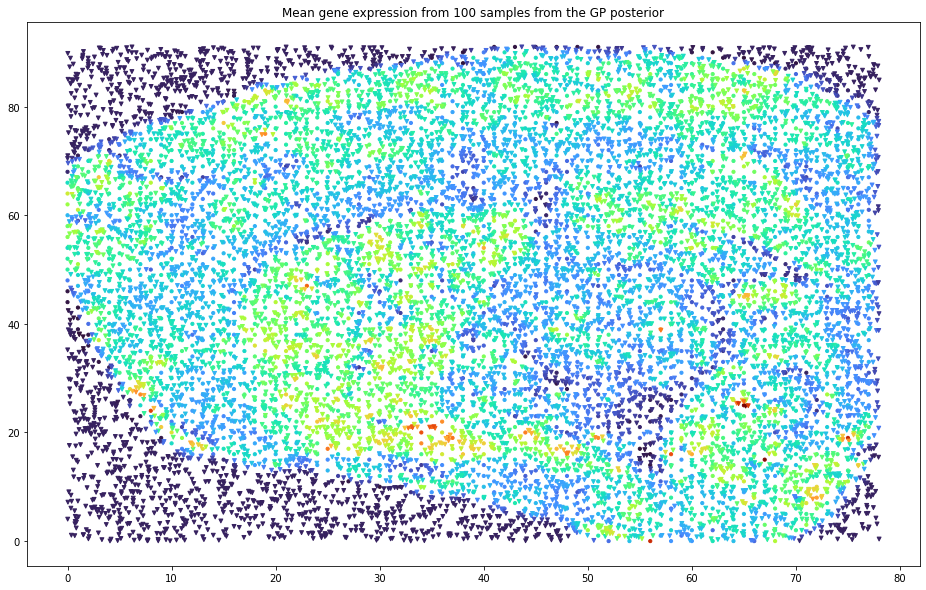

In [251]:
# Plot test and train samples
fig, ax = plt.subplots(figsize=(16,10))
plt.scatter(x,y, s = 10, c = gene_vals, cmap = 'turbo')
plt.scatter(uni_samp[:,0],uni_samp[:,1], s = 15, c = np.mean(f_post, axis=1), cmap = 'turbo', marker = 'v' )
pl.title('Mean gene expression from ' + str(n_samp) + ' samples from the GP posterior')
plt.show()

In [176]:
np.unique(x)

array([-5. , -4.9, -4.8, -4.7, -4.6, -4.5, -4.4, -4.3, -4.2, -4.1, -4. ,
       -3.9, -3.8, -3.7, -3.6, -3.5, -3.4, -3.3, -3.2, -3.1, -3. , -2.9,
       -2.8, -2.7, -2.6, -2.5, -2.4, -2.3, -2.2, -2.1, -2. , -1.9, -1.8,
       -1.7, -1.6, -1.5, -1.4, -1.3, -1.2, -1.1, -1. , -0.9, -0.8, -0.7,
       -0.6, -0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,
        0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,  1.2,  1.3,  1.4,  1.5,
        1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,  2.3,  2.4,  2.5,  2.6,
        2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,  3.4,  3.5,  3.6,  3.7,
        3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,  4.5,  4.6,  4.7,  4.8,
        4.9,  5. ])

In [184]:
# Convert into 1d function - take mean across cols
mean_row = np.zeros(len(np.unique(x)))
for c,ids in enumerate(np.unique(x)): #loop over rows
    mean_row[c] = np.mean(gene_vals[x == [ids]]) #take mean across columns

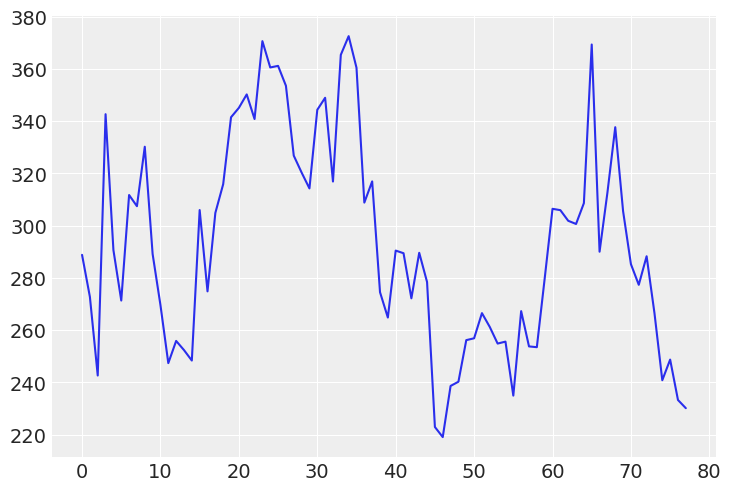

In [189]:
#Define train and test data
xtest = np.linspace(0.5, 77.5, 300)
ytrain = mean_row
xtrain = np.unique(x)
n = len(xtrain)

#visualise 1d plot
plt.plot(xtrain,ytrain)
plt.show()

In [168]:
RANDOM_SEED = 8927
rng = np.random.default_rng(RANDOM_SEED)
az.style.use("arviz-darkgrid")

In [186]:
squared_distance = lambda x, y: (x[None, :] - y[:, None]) ** 2
with pm.Model() as gp_fit:

    mu = np.zeros(n)

    eta_sq = pm.HalfCauchy("eta_sq", 5) #vertical variation
    rho_sq = pm.HalfCauchy("rho_sq", 5) #smoothness of function
    sigma_sq = pm.HalfCauchy("sigma_sq", 5) #variance of each gaussian

    D = squared_distance(xtrain, xtrain)

    # Squared exponential
    sigma = pt.fill_diagonal(eta_sq * pt.exp(-rho_sq * D), eta_sq + sigma_sq)

    obs = pm.MvNormal("obs", mu, sigma, observed=ytrain)   #Likelihood

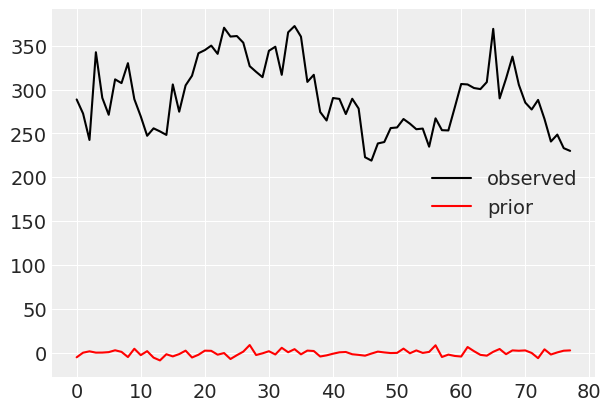

In [192]:
fig, ax = plt.subplots(figsize = (6,4))
plt.plot(xtrain,ytrain, c='k', label = 'observed')
plt.plot(xtrain,obs.eval(), c='red', label = 'prior')
plt.legend()

In [193]:
# Prediction in 1d
D_pred = squared_distance(xtest, xtest)
D_off_diag = squared_distance(xtrain, xtest)

gp_fit.add_coords({"pred_id": xgrid, "pred_id2": xgrid})

with gp_fit as gp:
    # Covariance matrices for prediction
    sigma_pred = eta_sq * pt.exp(-rho_sq * D_pred)
    sigma_off_diag = eta_sq * pt.exp(-rho_sq * D_off_diag)

    # Posterior mean
    mu_post = pm.Deterministic(
        "mu_post", pt.dot(pt.dot(sigma_off_diag, pm.math.matrix_inverse(sigma)), y), dims="pred_id"
    )
    # Posterior covariance
    sigma_post = pm.Deterministic(
        "sigma_post",
        sigma_pred
        - pt.dot(pt.dot(sigma_off_diag, pm.math.matrix_inverse(sigma)), sigma_off_diag.T),
        dims=("pred_id", "pred_id2"),
    )

In [194]:
pm.model_to_graphviz(gp)

ImportError: This function requires the python library graphviz, along with binaries. The easiest way to install all of this is by running

	conda install -c conda-forge python-graphviz

In [195]:
conda install -c conda-forge python-graphviz

Retrieving notices: ...working... done
Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 22.11.1
  latest version: 23.1.0

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.1.0



## Package Plan ##

  environment location: /cndd3/dburrows12/.conda/envs/py_38

  added / updated specs:
    - python-graphviz


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    cairo-1.16.0               |    h18b612c_1001         1.5 MB  conda-forge
    expat-2.4.8                |       h27087fc_0         187 KB  conda-forge
    fontconfig-2.14.0  

In [ ]:
with gp_fit:
    svgd_approx = pm.fit(400, method="svgd", inf_kwargs=dict(n_particles=100))

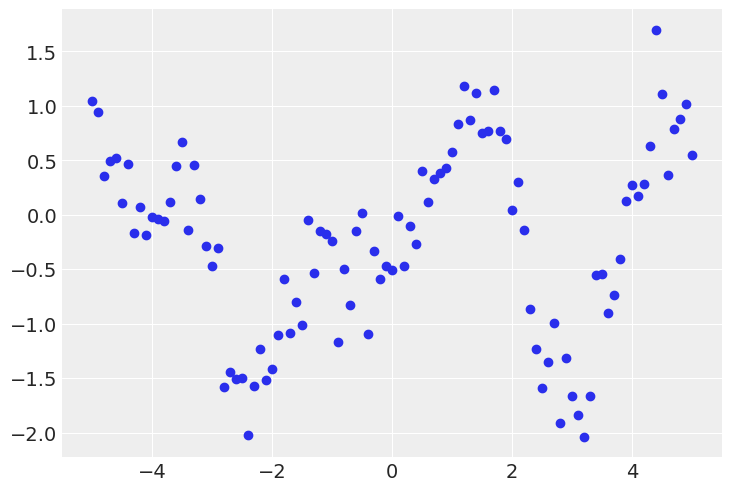

In [7]:
plt.scatter(x,y)
plt.show()

In [164]:
squared_distance = lambda x, y: (x[None, :] - y[:, None]) ** 2
with pm.Model() as gp_fit:

    mu = np.zeros(N)

    eta_sq = pm.HalfCauchy("eta_sq", 5) #vertical variation
    rho_sq = pm.HalfCauchy("rho_sq", 5) #smoothness of function
    sigma_sq = pm.HalfCauchy("sigma_sq", 5) #variance of each gaussian? 

    D = squared_distance(x, x)

    # Squared exponential
    sigma = pt.fill_diagonal(eta_sq * pt.exp(-rho_sq * D), eta_sq + sigma_sq)

    obs = pm.MvNormal("obs", mu, sigma, observed=y)   #Likelihood

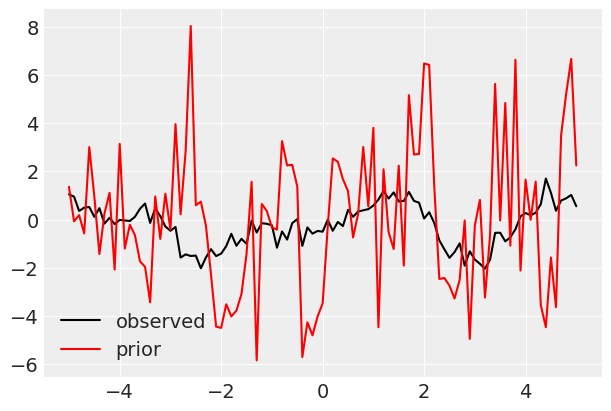

In [40]:
fig, ax = plt.subplots(figsize = (6,4))
plt.plot(x,y, c='k', label = 'observed')
plt.plot(x,obs.eval(), c='red', label = 'prior')
plt.legend()

In [86]:
# Prediction over grid
xgrid = np.linspace(-6, 6)
D_pred = squared_distance(xgrid, xgrid)
D_off_diag = squared_distance(x, xgrid)

gp_fit.add_coords({"pred_id": xgrid, "pred_id2": xgrid})

with gp_fit as gp:
    # Covariance matrices for prediction
    sigma_pred = eta_sq * pt.exp(-rho_sq * D_pred)
    sigma_off_diag = eta_sq * pt.exp(-rho_sq * D_off_diag)

    # Posterior mean
    mu_post = pm.Deterministic(
        "mu_post", pt.dot(pt.dot(sigma_off_diag, pm.math.matrix_inverse(sigma)), y), dims="pred_id"
    )
    # Posterior covariance
    sigma_post = pm.Deterministic(
        "sigma_post",
        sigma_pred
        - pt.dot(pt.dot(sigma_off_diag, pm.math.matrix_inverse(sigma)), sigma_off_diag.T),
        dims=("pred_id", "pred_id2"),
    )

In [10]:
with gp_fit:
    svgd_approx = pm.fit(400, method="svgd", inf_kwargs=dict(n_particles=100))

In [115]:
gp_trace = svgd_approx.sample(1000)

In [126]:
gp_trace

Inference data with groups:
	> posterior
	> observed_data

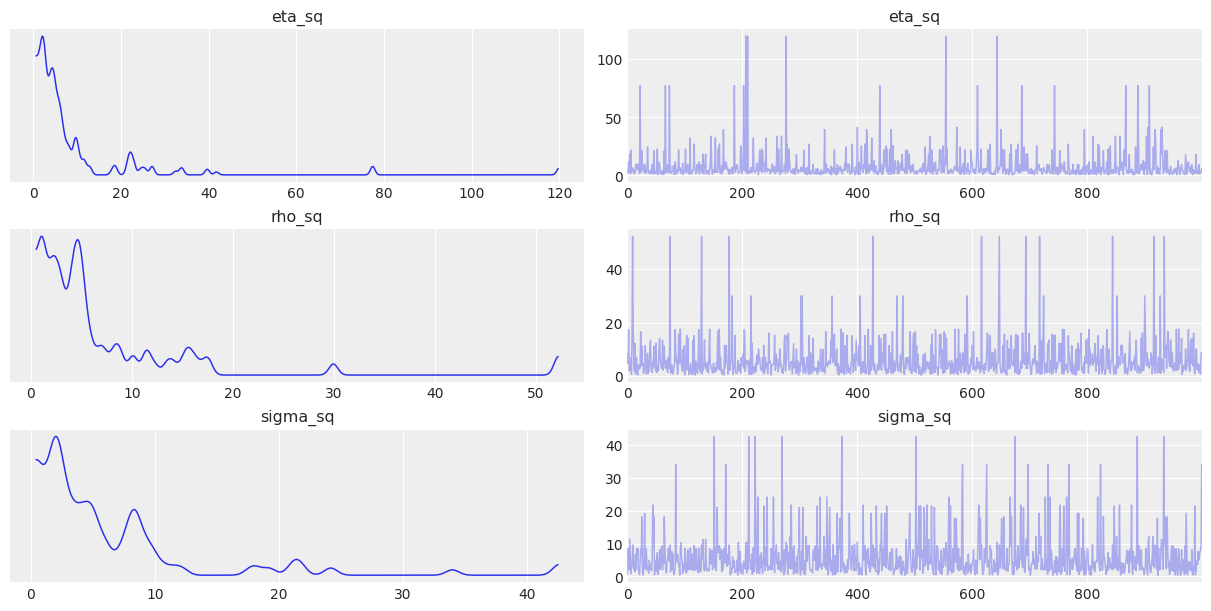

In [117]:
az.plot_trace(gp_trace, var_names=["eta_sq", "rho_sq", "sigma_sq"]);

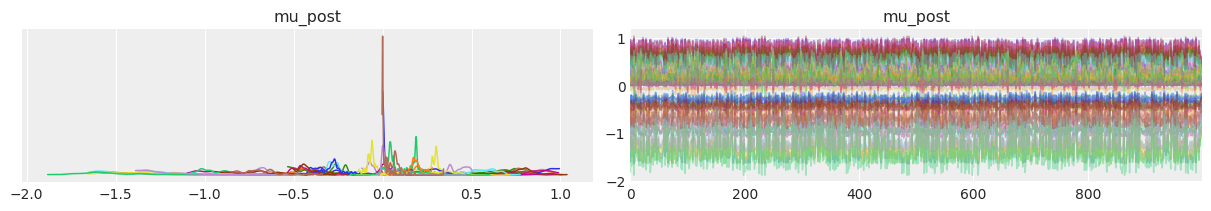

In [127]:
az.plot_trace(gp_trace, var_names=["mu_post"]);

In [129]:
xgrid.shape

(50,)

In [130]:
post["mu_post"].shape

(50, 200)

In [123]:
post["mu_post"].shape, post["sigma_post"].shape

((50, 200), (50, 50, 200))

In [118]:
post = az.extract(gp_trace, num_samples=200)

y_pred = multivariate_normal(
    post["mu_post"], post["sigma_post"], dims=("pred_id", "pred_id2")
).rvs()

In [125]:
y_pred.shape

(50, 200)

In [136]:
np.mean(y_pred,axis=0)

(200,)

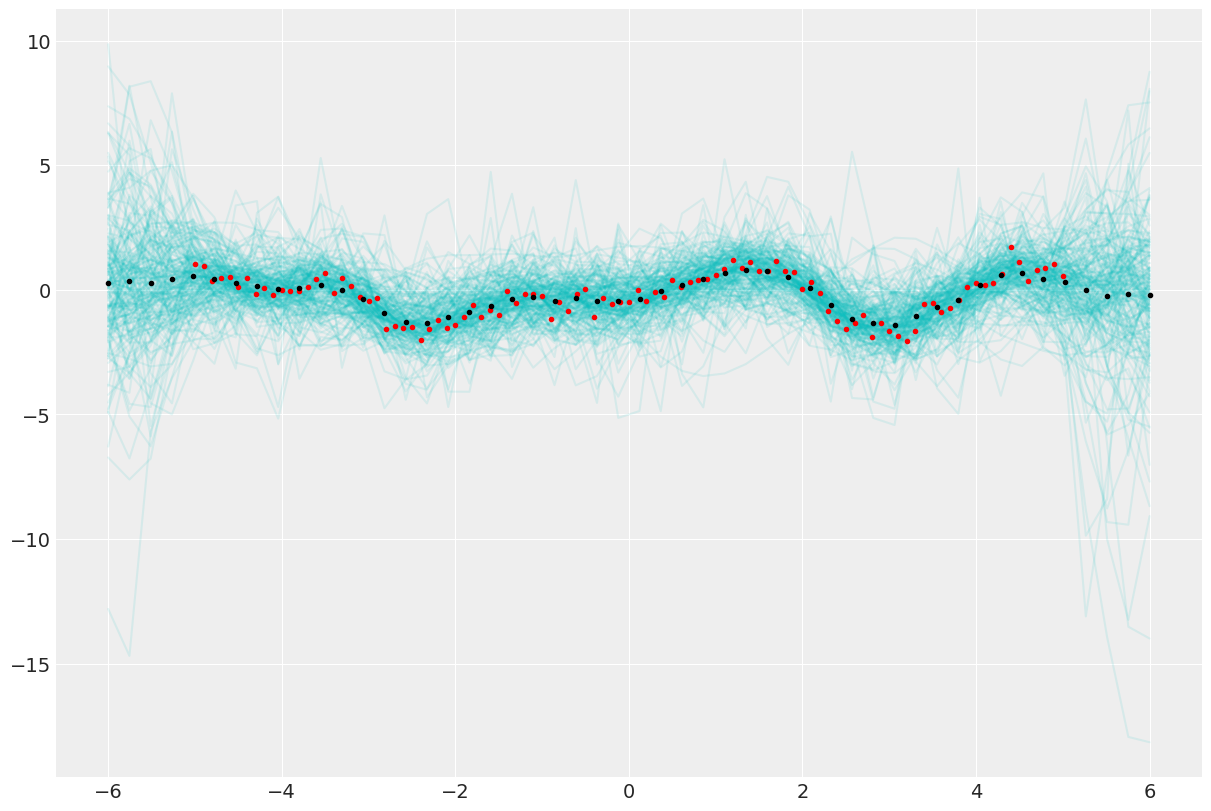

In [139]:
_, ax = plt.subplots(figsize=(12, 8))
ax.plot(xgrid, y_pred.transpose(..., "sample"), "c-", alpha=0.1)
ax.plot(x, y, "r.");
ax.plot(xgrid,np.mean(y_pred,axis=1), "k.")

In [64]:
#Train x datapoints
np.unique(x)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77])

In [12]:
#Test x datapoints
Xtest = np.linspace(0.5, 77.5, 300)
n = len(Xtest)


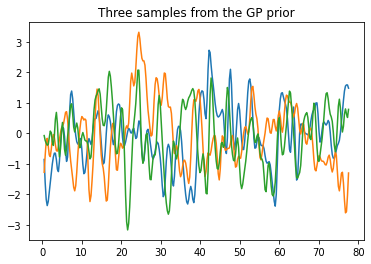

In [ ]:
#Define priors
import numpy as np
import matplotlib.pyplot as pl

#Test x datapoints
Xtest = np.linspace(0.5, 77.5, 300).reshape(-1,1)
n = len(Xtest)

# Define the kernel function
def kernel(a, b, param):
    sqdist = np.sum(a**2,1).reshape(-1,1) + np.sum(b**2,1) - 2*np.dot(a, b.T)
    return np.exp(-.5 * (1/param) * sqdist)

param = 0.4
K_ss = kernel(Xtest, Xtest, param)

# Get cholesky decomposition (square root) of the
# covariance matrix
L = np.linalg.cholesky(K_ss + 1e-15*np.eye(n)) #L is the square root of our covariance matrix


# Sample 3 sets of standard normals for our test points,
# multiply them by the square root of the covariance matrix
f_prior = np.dot(L, np.random.normal(size=(n,3))) #Sampling 50 normal variables 3 times, and multiply by SQR of covariance to get the variance in standard values 

# Now let's plot the 3 sampled functions.
pl.plot(Xtest, f_prior)
pl.title('Three samples from the GP prior')
pl.show()

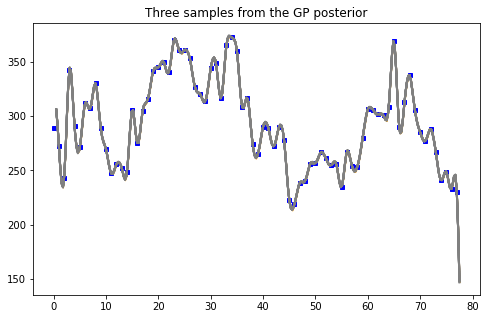

In [82]:
n_samp = 10

# Training data
Xtrain = np.unique(x).reshape(len(np.unique(x)),1)
ytrain = mean_row 

# Apply the kernel function to our training points
K = kernel(Xtrain, Xtrain, param)
L = np.linalg.cholesky(K + 0.00005*np.eye(len(Xtrain))) 

# Compute the mean at our test points.
K_s = kernel(Xtrain, Xtest, param) #kernel of similarity between each X train and each X test point in X
Lk = np.linalg.solve(L, K_s) 
mu = np.dot(Lk.T, np.linalg.solve(L, ytrain)).reshape((n,))

# Compute the standard deviation so we can plot it
s2 = np.diag(K_ss) - np.sum(Lk**2, axis=0)
stdv = np.sqrt(s2)

# Draw samples from the posterior at our test points.
L = np.linalg.cholesky(K_ss + 1e-6*np.eye(n) - np.dot(Lk.T, Lk))
f_post = mu.reshape(-1,1) + np.dot(L, np.random.normal(size=(n,n_samp)))

fig, ax = plt.subplots(figsize=(8,5))
pl.plot(Xtrain, ytrain, 'bs', ms=4)
pl.plot(Xtest, f_post, linewidth = 2, c = 'grey')
pl.gca().fill_between(Xtest.flat, mu-2*stdv, mu+2*stdv, color="orange")
pl.title('Three samples from the GP posterior')
pl.show()

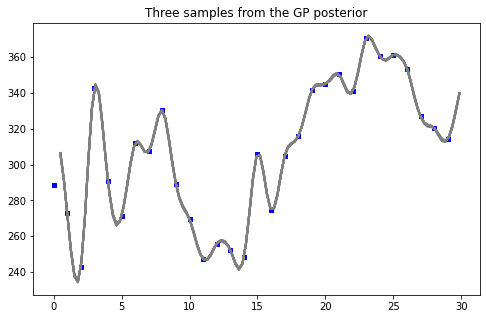

In [83]:
#Show at more fine grained scale
stop = 30
fig, ax = plt.subplots(figsize=(8,5))
pl.plot(Xtrain[:stop], ytrain[:stop], 'bs', ms=4)
pl.plot(Xtest[Xtest<stop], f_post[:sum(Xtest<stop)[0],:], linewidth = 2, c = 'grey')
#pl.gca().fill_between(Xtest.flat, mu-2*stdv, mu+2*stdv, color="orange")
pl.title('Three samples from the GP posterior')
pl.show()